## Scaling Numeric Data Exercises

In [72]:
# Imports for data manipulation
import pandas as pd
import numpy as np

# Imports for exploration
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

#imports for spliting and scaling
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#imports for acquisition and prep
from wrangle import wrangle_zillow

#import to silence warnings
import warnings
warnings.filterwarnings('ignore')

#setting to view all the data 
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [73]:
# collect data
zillow = wrangle_zillow()
zillow.head()

Using cached csv file...


,bedrooms,bathrooms,area,taxable_value,year_built,tax_amount,county,county_los_angeles_ca,county_orange_ca,county_ventura_ca
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,los_angeles_ca,1,0,0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,los_angeles_ca,1,0,0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,los_angeles_ca,1,0,0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,los_angeles_ca,1,0,0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,los_angeles_ca,1,0,0


In [74]:
# split data into train, test, split
x_train_val , x_test = train_test_split(zillow , random_state=1729)
x_train, x_validate = train_test_split(x_train_val, random_state=1729)

1) Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .


In [75]:
# view train dataset
x_train.head()

,bedrooms,bathrooms,area,taxable_value,year_built,tax_amount,county,county_los_angeles_ca,county_orange_ca,county_ventura_ca
1234956,4.0,3.0,2201.0,923727.0,1986.0,10665.41,los_angeles_ca,1,0,0
1063371,4.0,3.0,2348.0,388018.0,1965.0,4442.00,orange_ca,0,1,0
827142,4.0,3.0,2119.0,439268.0,1965.0,5119.46,orange_ca,0,1,0
1456708,3.0,3.0,1401.0,733284.0,1956.0,8769.95,los_angeles_ca,1,0,0
1753341,2.0,1.0,1019.0,516713.0,1925.0,5685.88,orange_ca,0,1,0


In [76]:
# view tax amount
x_train_tax = x_train[['tax_amount']]
x_train_tax.head()

,tax_amount
1234956,10665.41
1063371,4442.00
827142,5119.46
1456708,8769.95
1753341,5685.88


Text(0.5, 1.0, 'MinMax Scaled')

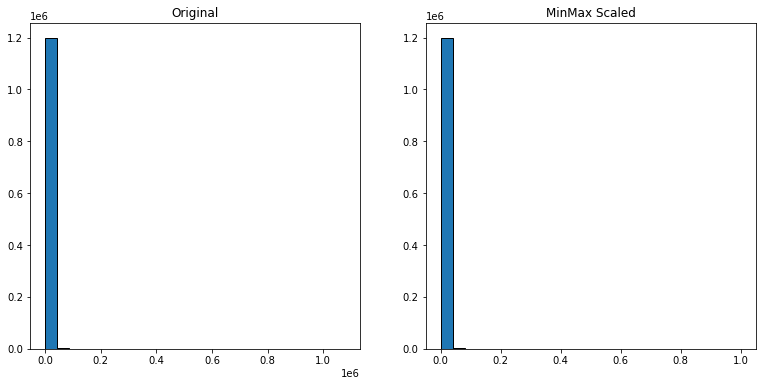

In [77]:
# MinMax Scaler

# Create 
minmax = sklearn.preprocessing.MinMaxScaler()
minmax.fit(x_train_tax)

x_train_minmax = minmax.transform(x_train_tax)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train_tax, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_minmax, bins=25, ec='black')
plt.title('MinMax Scaled')

Text(0.5, 1.0, 'Standard Scaled')

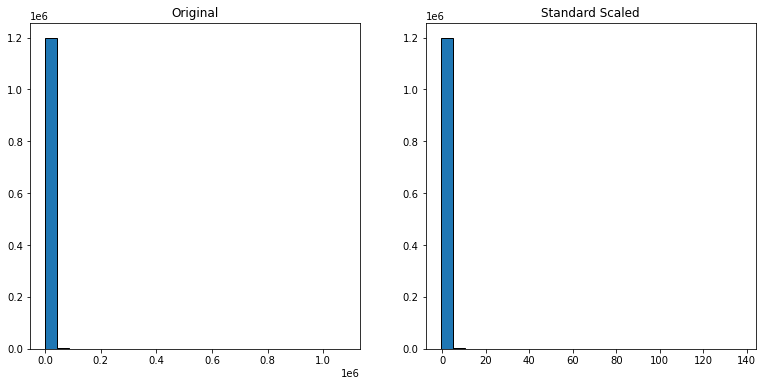

In [78]:
# Standard Scaler
standard = sklearn.preprocessing.StandardScaler()
standard.fit(x_train_tax)

x_train_standard = standard.transform(x_train_tax)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train_tax, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_standard, bins=25, ec='black')
plt.title('Standard Scaled')

Text(0.5, 1.0, 'Robust Scaled')

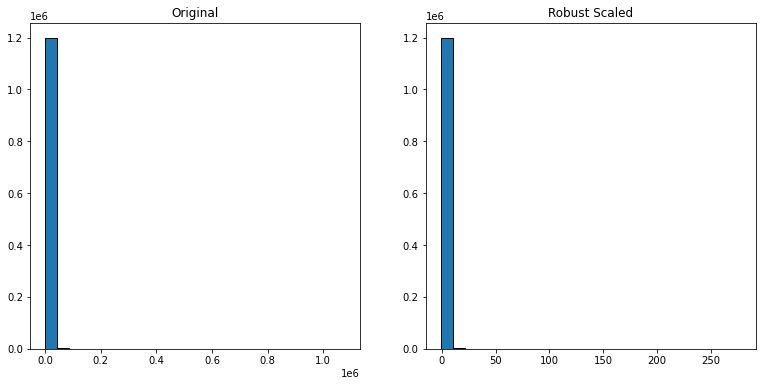

In [79]:
# Robust Scaler
robust = sklearn.preprocessing.RobustScaler()
robust.fit(x_train_tax)

x_train_robust = robust.transform(x_train_tax)

plt.figure(figsize=(13, 6))

plt.subplot(121)
plt.hist(x_train_tax, bins=25, ec='black')
plt.title('Original')

plt.subplot(122)
plt.hist(x_train_robust, bins=25, ec='black')
plt.title('Robust Scaled')

2) Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?


In [99]:
inverse_minmax = pd.DataFrame(minmax.inverse_transform(x_train_minmax))
inverse_minmax.head(), x_train_tax.head()

(          0
 0  10665.41
 1   4442.00
 2   5119.46
 3   8769.95
 4   5685.88,
          tax_amount
 1234956    10665.41
 1063371     4442.00
 827142      5119.46
 1456708     8769.95
 1753341     5685.88)

In [100]:
inverse_standard = pd.DataFrame(standard.inverse_transform(x_train_standard))
inverse_standard.head(), x_train_tax.head()

(          0
 0  10665.41
 1   4442.00
 2   5119.46
 3   8769.95
 4   5685.88,
          tax_amount
 1234956    10665.41
 1063371     4442.00
 827142      5119.46
 1456708     8769.95
 1753341     5685.88)

In [101]:
inverse_robust = pd.DataFrame(robust.inverse_transform(x_train_robust))
inverse_robust.head(), x_train_tax.head()

(          0
 0  10665.41
 1   4442.00
 2   5119.46
 3   8769.95
 4   5685.88,
          tax_amount
 1234956    10665.41
 1063371     4442.00
 827142      5119.46
 1456708     8769.95
 1753341     5685.88)

In [126]:
# Pulled from scaling exercise review and fit to my data
print(f'Exact match: {(minmax.inverse_transform(x_train_minmax) == x_train_tax).all()}\n\n\
Close match: {np.isclose(minmax.inverse_transform(x_train_minmax), x_train_tax).all()}')

Exact match: tax_amount    False
dtype: bool

Close match: True


- Just by looking at the first 5 they look the same. When comparing exactly they are not. When comparing with np.isclose they are pretty much the same.

3) Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.


Text(0.5, 1.0, 'Quantile Scaled')

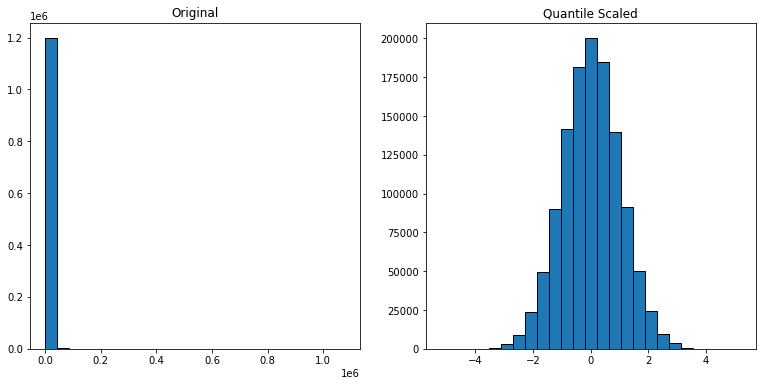

In [103]:
# Quantile Transformer
quan = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
quan.fit(x_train_tax)

x_train_quan = quan.transform(x_train_tax)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train_tax, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_quan, bins=25, ec='black')
plt.title('Quantile Scaled')

4) Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?


Text(0.5, 1.0, 'Quantile Scaled')

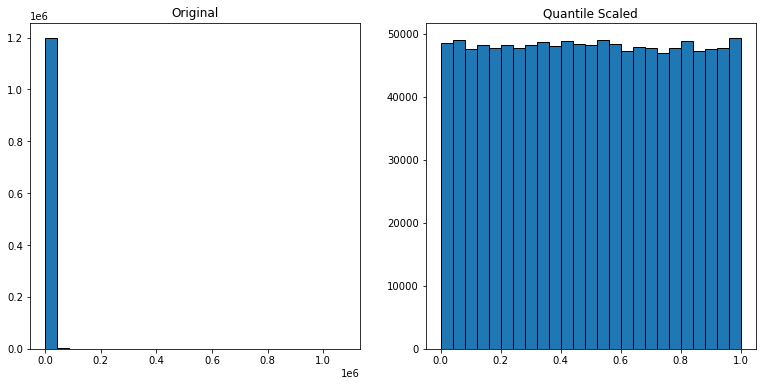

In [104]:
# Quantile Transformer
quan = sklearn.preprocessing.QuantileTransformer()
quan.fit(x_train_tax)

x_train_quan = quan.transform(x_train_tax)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train_tax, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_quan, bins=25, ec='black')
plt.title('Quantile Scaled')

- The scaling range was different which was needed to change the distribution from normal to uniform.

5) Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [127]:
def scale_data(train, validate, test, return_scaler=False):
    '''
    This function scales the split data and returns a scaled version of the dataset.
    
    If return_scaler is true, the scaler will be returned as well.
    '''
    
    col = train.columns[train.dtypes == 'float']

    train_scaled = train
    validate_scaled = validate
    test_scaled = test

    scaler = sklearn.preprocessing.MinMaxScaler()
    scaler.fit(train[col])
    
    train_scaled[col] = scaler.transform(train[col])
    validate_scaled[col] = scaler.transform(validate[col])
    test_scaled[col] = scaler.transform(test[col])
    
    if return_scaler:
        return train_scaled, validate_scaled, test_scaled, scaler
    else:
        return train_scaled, validate_scaled, test_scaled